<a href="https://colab.research.google.com/github/TeramisuS/GIT/blob/master/7.%20Deep%20Learning%20CNN/3_DeepLearning_ConvolutionNeuralNetworks_CATSDOGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Learning For Object Detection and Image Classification

<h3 align='center'> Deep Learning on Custom Images </h3>

How to work with our own custom image data sets (raw images and how to resize them)

- The dataset 'Cats and Dogs' is 774 MB and is uploaded on google drive
- using <i> flow_from_directory </i> we can extract images to Colab environment

In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# Checking GPU available on Colab

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

'''
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
'''

Tue Mar  4 18:06:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

'\n%tensorflow_version 2.x\nimport tensorflow as tf\nprint("Tensorflow version " + tf.__version__)\n\ntry:\n  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection\n  print(\'Running on TPU \', tpu.cluster_spec().as_dict()[\'worker\'])\nexcept ValueError:\n  raise BaseException(\'ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!\')\n\ntf.config.experimental_connect_to_cluster(tpu)\ntf.tpu.experimental.initialize_tpu_system(tpu)\ntpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)\n'

In [7]:
!unzip /content/CATS_DOGS.zip

Archive:  /content/CATS_DOGS.zip
   creating: CATS_DOGS/
   creating: CATS_DOGS/CATS_DOGS/
   creating: CATS_DOGS/CATS_DOGS/test/
   creating: CATS_DOGS/CATS_DOGS/test/CAT/
  inflating: CATS_DOGS/CATS_DOGS/test/CAT/j1.jpg  
  inflating: CATS_DOGS/CATS_DOGS/test/CAT/j2.jpg  
  inflating: CATS_DOGS/CATS_DOGS/test/CAT/j5.jpg  
   creating: CATS_DOGS/CATS_DOGS/test/DOG/
  inflating: CATS_DOGS/CATS_DOGS/test/DOG/s1.jpg  
  inflating: CATS_DOGS/CATS_DOGS/test/DOG/s3.jpg  
   creating: CATS_DOGS/CATS_DOGS/test/DRAGON/
  inflating: CATS_DOGS/CATS_DOGS/test/DRAGON/t1.jpg  
  inflating: CATS_DOGS/CATS_DOGS/test/DRAGON/t4.jpg  
  inflating: CATS_DOGS/CATS_DOGS/test/DRAGON/t5.jpg  
  inflating: CATS_DOGS/CATS_DOGS/test/DRAGON/t8.jpg  
  inflating: CATS_DOGS/CATS_DOGS/test/DRAGON/t9.jpg  
   creating: CATS_DOGS/CATS_DOGS/train/
   creating: CATS_DOGS/CATS_DOGS/train/CAT/
  inflating: CATS_DOGS/CATS_DOGS/train/CAT/j3.jpg  
  inflating: CATS_DOGS/CATS_DOGS/train/CAT/j4.jpg  
   creating: CATS_DOGS/CA

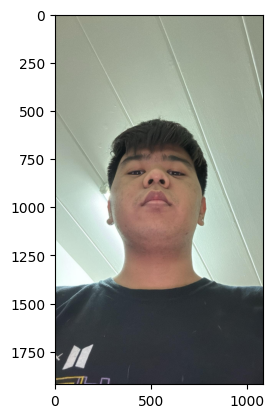

In [8]:
# Reading a single image from the drive

#First need to mount the drive and copy the path of the image

cat4 = cv2.imread('//content/CATS_DOGS/CATS_DOGS/train/CAT/j3.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [9]:
cat4.shape #three color channel

(1920, 1080, 3)

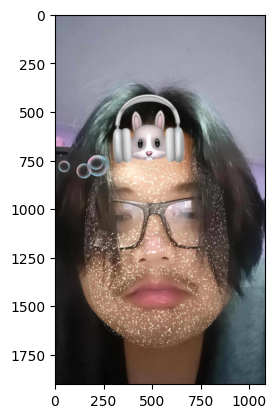

In [10]:
#Lets upload a DOG

dog = cv2.imread('/content/CATS_DOGS/CATS_DOGS/train/DOG/s2.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [11]:
dog.shape

(1902, 1080, 3)

So we see images are not same size. So to make sure everytime we have any image, we need to pre-process the image. In Keras, we have a function <b> automatically process data and generate flow of batches from a directory -- > ImageDataGenerator</b>

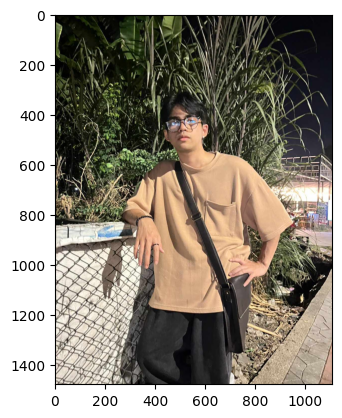

In [12]:
dragon = cv2.imread('/content/CATS_DOGS/CATS_DOGS/train/DRAGON/t6.jpg')
dragon = cv2.cvtColor(dragon, cv2.COLOR_BGR2RGB)
plt.imshow(dragon)

In [13]:
dragon.shape

(1477, 1108, 3)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# not only size will be different, there will be image fluctuations such as side or top view so that images are clearly visible.

image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest',)


#rotation range = randomly rotate images (minor)
#width_shift_range = shift the width a bit along x axis (%)
#height_shift_range = shift the height a bit along y axis (%)
#rescale = normalize by 255
#shear_range = cuts away part of the image
#zoom_range = zoom image
#horizontal_flip = along y axis
#vertical_flip = along x axis
#When we rescale, shifting, zoom, sheaer, there might be some missing pixels so we can fill those pixels by nearest pixel size

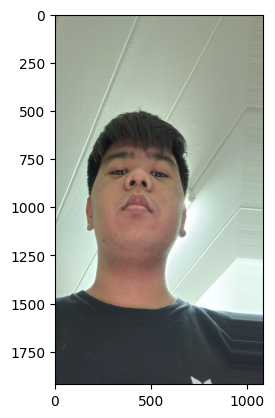

In [15]:
plt.imshow(image_gen.random_transform(cat4))

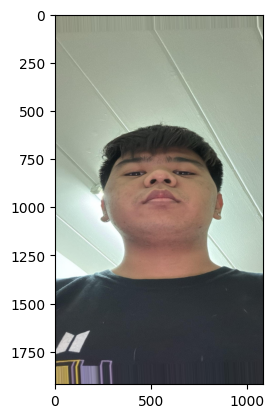

In [16]:
plt.imshow(image_gen.random_transform(cat4)) #View 2

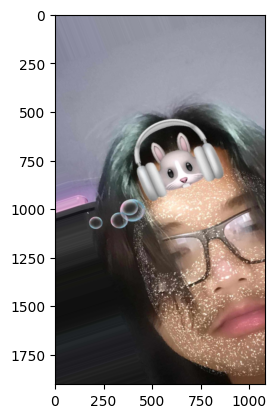

In [17]:
plt.imshow(image_gen.random_transform(dog)) #View 1

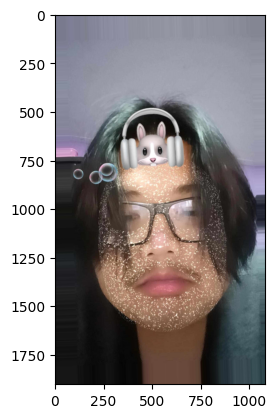

In [18]:
plt.imshow(image_gen.random_transform(dog)) #View 2

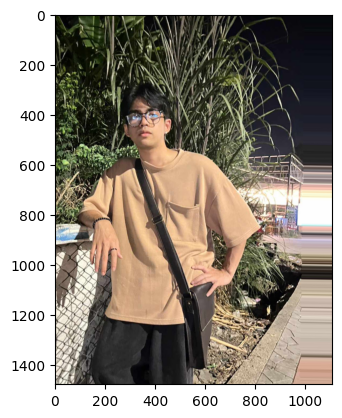

In [19]:
plt.imshow(image_gen.random_transform(dragon)) #View 3

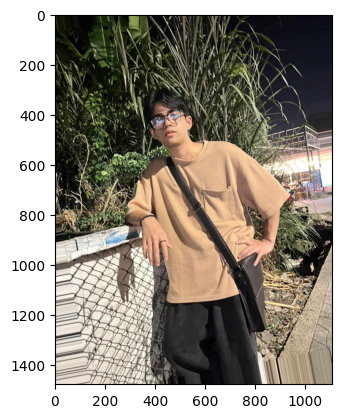

In [20]:
plt.imshow(image_gen.random_transform(dragon)) #View 1

In [21]:
image_gen.flow_from_directory('/content/CATS_DOGS/CATS_DOGS/train')

Found 7 images belonging to 3 classes.


In [22]:
#Build and train out model now

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation

input_shape=(150,150,3)

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5)) #randomly turned 50% off neurons - help in overfitting

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,367,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
batch_size= 16

train_image_gen = image_gen.flow_from_directory('/content/CATS_DOGS/CATS_DOGS/train',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

test_image_gen = image_gen.flow_from_directory('/content/CATS_DOGS/CATS_DOGS/test',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 7 images belonging to 3 classes.
Found 10 images belonging to 3 classes.


In [25]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1, 'DRAGON': 2}

In [26]:
!pip install --upgrade tensorflow

In [5]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [27]:
import warnings
warnings.filterwarnings('ignore')

# Using epochs = 30 to achieve > 70% accuracy and can run 100 epochs to have 85 % accuracy

results = model.fit(train_image_gen,epochs=30,steps_per_epoch=150,
                              validation_data=test_image_gen,validation_steps=12) #150*16 iamges per epoch to save training time

Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.0000e+00 - loss: 0.6763 - val_accuracy: 0.2000 - val_loss: -1.4666
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1429 - loss: -1.6581 - val_accuracy: 0.2000 - val_loss: -3.6104
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1429 - loss: -4.1073 - val_accuracy: 0.2000 - val_loss: -7.0635
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1429 - loss: -8.4986 - val_accuracy: 0.2000 - val_loss: -15.1562
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1429 - loss: -25.6446 - val_accuracy: 0.2000 - val_loss: -26.2691
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1429 - loss: -18.4753 - val_accuracy: 0.2000 - val_loss: -34.9955
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1429 - loss: -39.0965 - val_accuracy: 0.2000 - val_loss: -61.3904
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1429 - loss: 

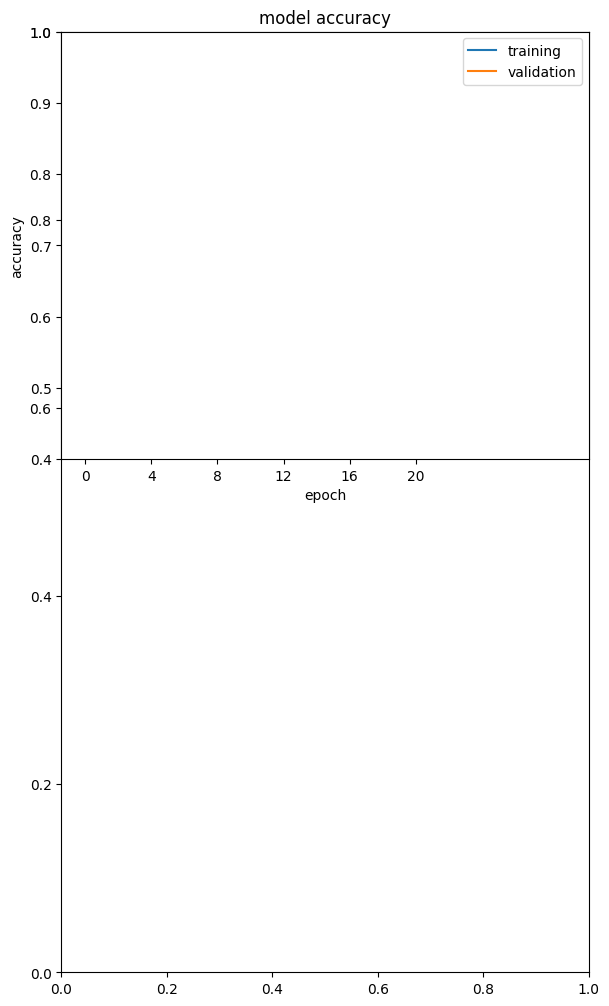

In [28]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])
  ax.set_ylim(0.4,1)
  ax.set_xticks([0,4,8,12,16,20])

plt.subplots(figsize=(6,10))
plt.tight_layout()
display_training_curves(results.history['accuracy'], results.history['val_accuracy'], 'accuracy', 211)

##### Prediction on images

In [30]:
from keras.preprocessing import image
import numpy as np

dog_file = '/content/CATS_DOGS/CATS_DOGS/test/DOG/s1.jpg'
dog_img = image.load_img(dog_file,target_size=(150,150))
dog_img = image.img_to_array(dog_img) # to array #dog_img.shape = 150,150,3

#but we need to covnert this iamge to a batch so NN thinks it is a batch of 1 with this iamge dimensions

dog_img = np.expand_dims(dog_img,axis=0) #now dog_img.shape = 1,150,150,3

dog_img = dog_img/255 #normalize

In [32]:
#to check accuracy

model.predict(dog_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


array([[1.]], dtype=float32)